# 1 Data Exploratory and Preprocessing

### 1.1 importing the necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('insurance.csv')
print(df.head())
# checking also for the data type of each column
print(df.dtypes)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


### 1.2 Descriptive statistics on the data

In [3]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### 1.3 Checking for null values

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# from the above description, this is null value in our dataset

### 1.4 checking the probability distribution curve of the numerical data

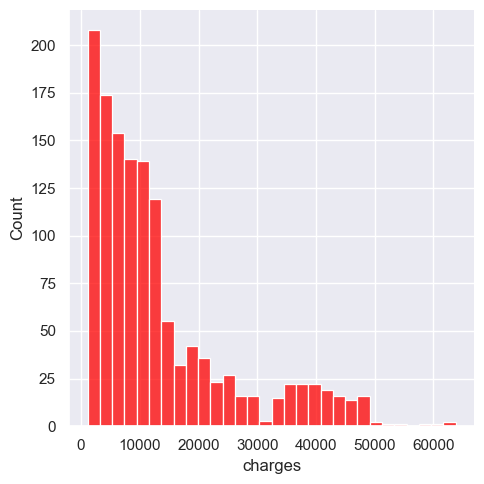

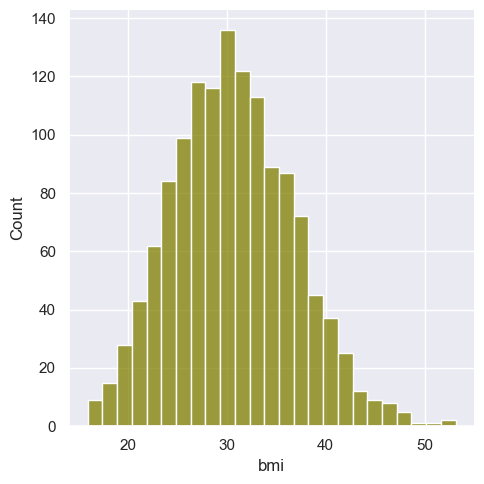

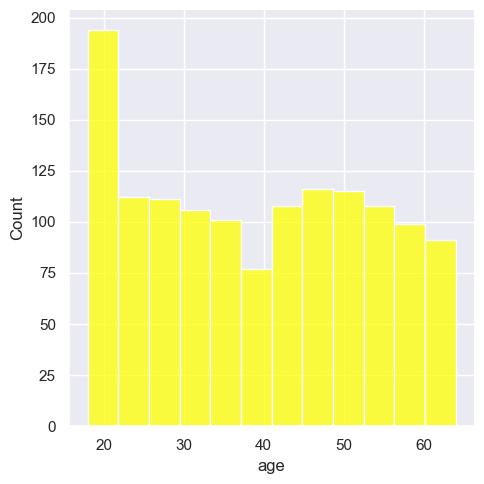

In [6]:

sns.displot(df['charges'], color='red')
sns.displot(df['bmi'] , color ='olive')
sns.displot(df['age'], color = 'yellow')


plt.show()

### Checking for Outliers

<Axes: ylabel='bmi'>

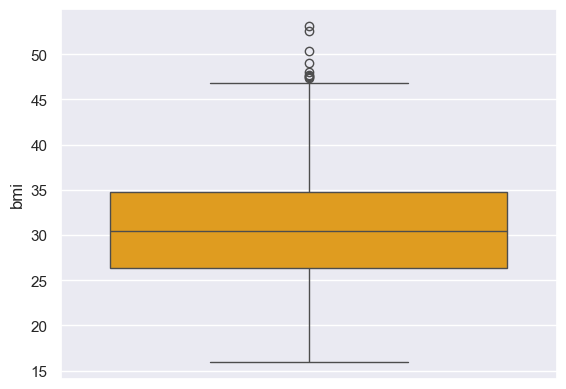

In [7]:
sns.boxplot(df['bmi'],color='orange')

<Axes: ylabel='age'>

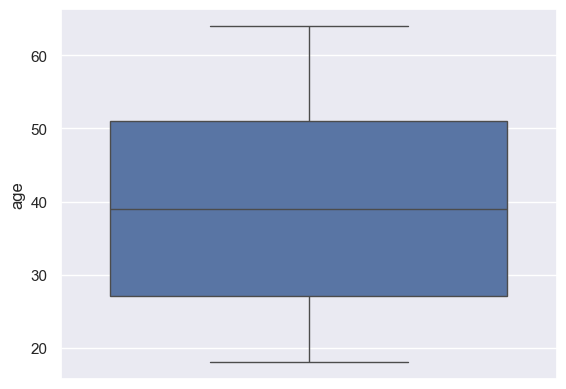

In [8]:
sns.boxplot(df['age'])

In [9]:
q = df['charges'].quantile(0.99)
data= df[df['charges']<q]
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1324.000000,1324,1324.000000,1324.000000,1324,1324,1324.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,667,NaN,NaN,1064,357,NaN
mean,39.089879,NaN,30.585400,1.097432,NaN,NaN,12847.275434
std,14.025792,NaN,6.067911,1.206693,NaN,NaN,11435.272603
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.220000,0.000000,NaN,NaN,4710.601913
50%,39.000000,NaN,30.275000,1.000000,NaN,NaN,9283.021300
75%,51.000000,NaN,34.443750,2.000000,NaN,NaN,16073.095438


In [10]:
q = data['bmi'].quantile(0.99)
data1= data[data['bmi']<q]
data1.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1310.000000,1310,1310.000000,1310.00000,1310,1310,1310.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,658,NaN,NaN,1053,346,NaN
mean,39.090076,NaN,30.396756,1.09313,NaN,NaN,12818.996893
std,14.039108,NaN,5.813286,1.20498,NaN,NaN,11372.709361
min,18.000000,NaN,15.960000,0.00000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.180000,0.00000,NaN,NaN,4718.533675
50%,39.000000,NaN,30.200000,1.00000,NaN,NaN,9273.638800
75%,51.000000,NaN,34.320000,2.00000,NaN,NaN,16081.116813


### Handling Outliers

<Axes: ylabel='bmi'>

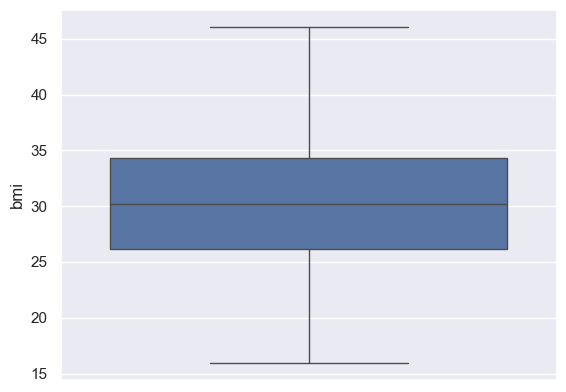

In [11]:
sns.boxplot(data1['bmi'])

In [12]:
data_cleaned = data1.reset_index(drop=True)

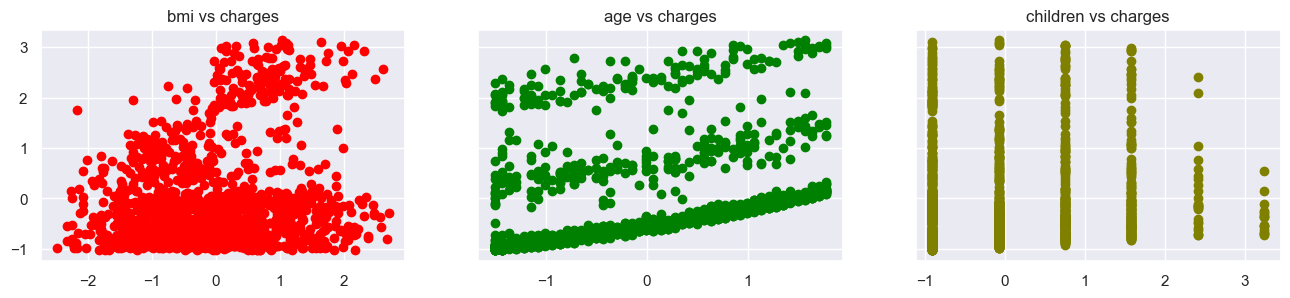

In [82]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(16,3))
ax1.scatter(data_cleaned['bmi'], data_cleaned['charges'], color='red')
ax1.set_title('bmi vs charges')
ax2.scatter(data_cleaned['age'], data_cleaned['charges'], color='green')
ax2.set_title('age vs charges')
ax3.scatter(data_cleaned['children'], data_cleaned['charges'], color='olive')
ax3.set_title('children vs charges')


plt.show()
                               

<Axes: xlabel='smoker', ylabel='charges'>

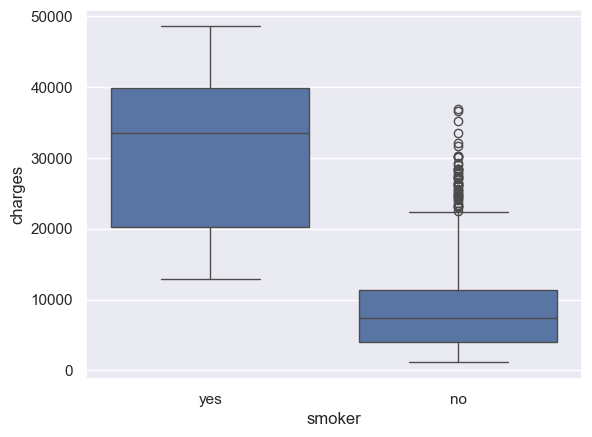

In [13]:
sns.boxplot(x='smoker',y='charges', data =data_cleaned)

### 1.5 Feature Engineering (converting age column to categorical)

In [15]:
# Age binning
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '60+']
data_cleaned['age_group'] = pd.cut(data_cleaned['age'], bins=bins, labels=labels, right=False)

data_cleaned

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,18-30
1,18,male,33.770,1,no,southeast,1725.55230,18-30
2,28,male,33.000,3,no,southeast,4449.46200,18-30
3,33,male,22.705,0,no,northwest,21984.47061,31-40
4,32,male,28.880,0,no,northwest,3866.85520,31-40
...,...,...,...,...,...,...,...,...
1305,50,male,30.970,3,no,northwest,10600.54830,51-60
1306,18,female,31.920,0,no,northeast,2205.98080,18-30
1307,18,female,36.850,0,no,southeast,1629.83350,18-30
1308,21,female,25.800,0,no,southwest,2007.94500,18-30


In [16]:
data_cleaned.describe(include='all')

,age,sex,bmi,children,smoker,region,charges,age_group
count,1310.000000,1310,1310.000000,1310.00000,1310,1310,1310.000000,1310
unique,NaN,2,NaN,NaN,2,4,NaN,5
top,NaN,male,NaN,NaN,no,southeast,NaN,18-30
freq,NaN,658,NaN,NaN,1053,346,NaN,412
mean,39.090076,NaN,30.396756,1.09313,NaN,NaN,12818.996893,NaN
std,14.039108,NaN,5.813286,1.20498,NaN,NaN,11372.709361,NaN
min,18.000000,NaN,15.960000,0.00000,NaN,NaN,1121.873900,NaN
25%,26.000000,NaN,26.180000,0.00000,NaN,NaN,4718.533675,NaN
50%,39.000000,NaN,30.200000,1.00000,NaN,NaN,9273.638800,NaN
75%,51.000000,NaN,34.320000,2.00000,NaN,NaN,16081.116813,NaN


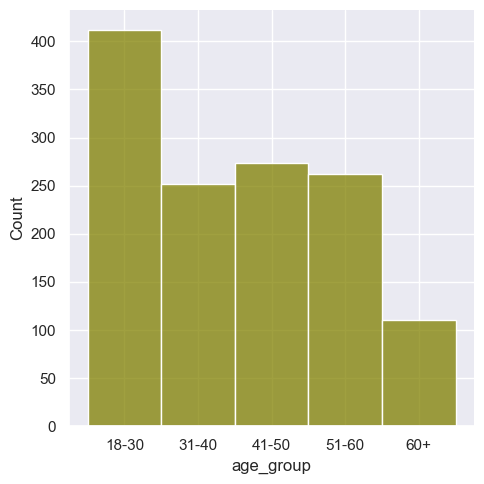

In [17]:
sns.displot(data_cleaned['age_group'], color='olive')

In [18]:
data_cleaned.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_group'], dtype=object)

In [19]:
data_cleaned.dtypes

age             int64
sex            object
bmi           float64
children        int64
smoker         object
region         object
charges       float64
age_group    category
dtype: object

### Divide the dataset into numerical and categorical using data Types

In [20]:
numerical_features = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data_cleaned.select_dtypes(include=['object','category']).columns

<Axes: >

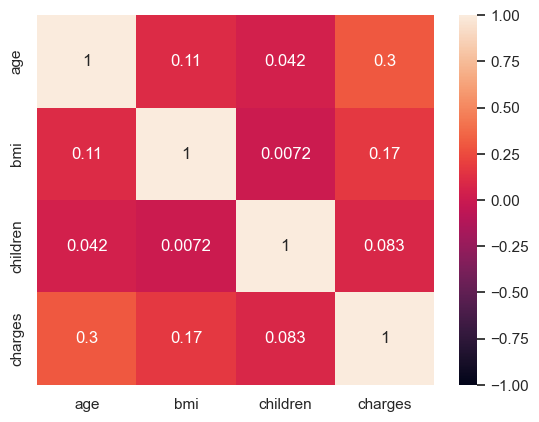

In [21]:
heatmap= sns.heatmap(data_cleaned[numerical_features].corr(), vmin =-1, vmax=1, annot=True)
heatmap

### 1.6 Feature Scaling / Standardization

$SD_{adj.} = \frac{x - u} {std}$

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()


In [24]:
data_cleaned[numerical_features]=scaler.fit_transform(data_cleaned[numerical_features])
data_cleaned[numerical_features]

,age,bmi,children,charges
0,-1.431555,-0.429655,-0.907523,0.357653
1,-1.502811,0.580486,-0.077317,-0.975817
2,-0.790243,0.447980,1.583095,-0.736213
3,-0.433959,-1.323639,-0.907523,0.806226
4,-0.505216,-0.261012,-0.907523,-0.787461
...,...,...,...,...
1305,0.777406,0.098647,1.583095,-0.195142
1306,-1.502811,0.262128,-0.907523,-0.933557
1307,-1.502811,1.110509,-0.907523,-0.984237
1308,-1.289041,-0.791035,-0.907523,-0.950977


In [25]:
data_cleaned_dummies= pd.get_dummies(data_cleaned, drop_first=True)

In [26]:
data_cleaned_dummies

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60+
0,-1.431555,-0.429655,-0.907523,0.357653,False,True,False,False,True,False,False,False,False
1,-1.502811,0.580486,-0.077317,-0.975817,True,False,False,True,False,False,False,False,False
2,-0.790243,0.447980,1.583095,-0.736213,True,False,False,True,False,False,False,False,False
3,-0.433959,-1.323639,-0.907523,0.806226,True,False,True,False,False,True,False,False,False
4,-0.505216,-0.261012,-0.907523,-0.787461,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0.777406,0.098647,1.583095,-0.195142,True,False,True,False,False,False,False,True,False
1306,-1.502811,0.262128,-0.907523,-0.933557,False,False,False,False,False,False,False,False,False
1307,-1.502811,1.110509,-0.907523,-0.984237,False,False,False,True,False,False,False,False,False
1308,-1.289041,-0.791035,-0.907523,-0.950977,False,False,False,False,True,False,False,False,False


In [27]:
data_cleaned_dummies.columns.values

array(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest',
       'age_group_31-40', 'age_group_41-50', 'age_group_51-60',
       'age_group_60+'], dtype=object)

In [77]:
# Re-arrange the dataset so that the target will be the first Column

In [28]:
data_preprocessed= data_cleaned_dummies[['charges', 'bmi', 'children', 'age', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest',
       'age_group_31-40', 'age_group_41-50', 'age_group_51-60',
       'age_group_60+']]
data_preprocessed

,charges,bmi,children,age,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60+
0,0.357653,-0.429655,-0.907523,-1.431555,False,True,False,False,True,False,False,False,False
1,-0.975817,0.580486,-0.077317,-1.502811,True,False,False,True,False,False,False,False,False
2,-0.736213,0.447980,1.583095,-0.790243,True,False,False,True,False,False,False,False,False
3,0.806226,-1.323639,-0.907523,-0.433959,True,False,True,False,False,True,False,False,False
4,-0.787461,-0.261012,-0.907523,-0.505216,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,-0.195142,0.098647,1.583095,0.777406,True,False,True,False,False,False,False,True,False
1306,-0.933557,0.262128,-0.907523,-1.502811,False,False,False,False,False,False,False,False,False
1307,-0.984237,1.110509,-0.907523,-1.502811,False,False,False,True,False,False,False,False,False
1308,-0.950977,-0.791035,-0.907523,-1.289041,False,False,False,False,True,False,False,False,False


# 2 Model Development

### 2.1 spliting the dataset into train and test

In [29]:
target = data_preprocessed['charges']
features = data_preprocessed.drop(['charges'],axis=1)

In [30]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(features,target, test_size=0.2, random_state=42)

In [44]:
x_train.shape

(1048, 12)

In [45]:
x_test.shape

(262, 12)

In [46]:
x_test

,bmi,children,age,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60+
701,-1.339987,-0.077317,0.706149,False,False,True,False,False,False,True,False,False
994,-0.481281,-0.907523,-0.077675,False,False,False,False,True,True,False,False,False
350,-0.481281,-0.907523,0.492379,True,False,False,False,True,False,True,False,False
986,-0.195619,0.752889,-0.790243,True,False,False,False,False,False,False,False,False
409,0.902286,-0.077317,0.278609,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
209,-0.326404,0.752889,-1.075271,True,False,True,False,False,False,False,False,False
306,-0.980329,-0.907523,-1.431555,False,False,False,False,True,False,False,False,False
140,-0.877077,0.752889,-0.362703,True,True,False,True,False,True,False,False,False
919,-0.157760,-0.907523,0.991177,True,False,False,True,False,False,False,True,False


In [47]:
y_train.shape

(1048,)

### 2.2 Build the regression model

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
reg = LinearRegression()

In [37]:
reg.fit(features,target)

LinearRegression()

### Perform K-fold cross validation on all three models to obtain the Mean Square Error value

### For Linear regression

In [50]:
# K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_score = cross_val_score(reg, x_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Print the mean cross-validation score
print("Mean Negative MSE:", cv_score.mean())


Mean Negative MSE: -0.2650259826650554


In [51]:
# Convert negative MSE to positive
mean_mse = -cv_score.mean()

# Print the mean cross-validation score
print("Mean MSE:", mean_mse)

Mean MSE: 0.2650259826650554


### For Suppport Vector Regression

In [52]:
# Define the model
svr = SVR()
svr.fit(features,target)



SVR()

In [54]:
# K-fold cross-validation
mse_score_svr=cross_val_score(svr, x_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()
mse_score_svr

-0.18280483756935573

In [56]:
#Convert negative MSE to positive
mean_mse = -mse_score_svr

# Print the mean cross-validation score
print("Mean MSE:", mean_mse)

Mean MSE: 0.18280483756935573


### For Random forest regression

In [57]:
# Define the model
rf_regressor = RandomForestRegressor()
rf_regressor.fit(features,target)

RandomForestRegressor()

In [59]:
# K-fold cross-validation
mse_score_rf=cross_val_score(rf_regressor, x_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()
mse_score_rf

-0.18289707872681552

In [60]:
# Convert negative MSE to positive
mean_mse = -mse_score_rf

# Print the mean cross-validation score
print("Mean MSE:", mean_mse)

Mean MSE: 0.18289707872681552


# 3 Model Evaluation

### 3.1 Compare all three model using MAE, RMSE, and R^2

In [63]:
# Train the models
reg.fit(x_train, y_train)
svr.fit(x_train, y_train)
rf_regressor.fit(x_train, y_train)

# Predictions
y_pred_reg =reg.predict(x_test)
y_pred_svr = svr.predict(x_test)
y_pred_rf = rf_regressor.predict(x_test)

# Evaluation metrics
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# Evaluate models
rmse_lr, mae_lr, r2_lr = evaluate_model(y_test, y_pred_reg)
rmse_svr, mae_svr, r2_svr = evaluate_model(y_test, y_pred_svr)
rmse_rf, mae_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

# Print results
print("Linear Regression - RMSE: {:.2f}, MAE: {:.2f}, R2: {:.2f}".format(rmse_lr, mae_lr, r2_lr))
print("SVR - RMSE: {:.2f}, MAE: {:.2f}, R2: {:.2f}".format(rmse_svr, mae_svr, r2_svr))
print("Random Forest - RMSE: {:.2f}, MAE: {:.2f}, R2: {:.2f}".format(rmse_rf, mae_rf, r2_rf))


Linear Regression - RMSE: 0.48, MAE: 0.33, R2: 0.72
SVR - RMSE: 0.38, MAE: 0.20, R2: 0.82
Random Forest - RMSE: 0.38, MAE: 0.21, R2: 0.82


### 3.2 Feature Selection using Recursive Feature Elimination 

In [68]:
# RFE for Linear Regression
rfe = RFE(reg, n_features_to_select=5)
rfe.fit(x_train, y_train)

# Display the top features
selected_features = x_train.columns[rfe.support_]
print("Top 5 features selected by RFE:", selected_features)


Top 5 features selected by RFE: Index(['bmi', 'age', 'smoker_yes', 'age_group_31-40', 'age_group_41-50'], dtype='object')


### 3.3 Using Hyperparameter tunning on Random Forest Regression

In [69]:
# Hyperparameter tuning for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(x_train, y_train)

# Best hyperparameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


### Predicting on the Test Set

In [71]:
# Predict on the test set
y_pred = grid_search_rf.best_estimator_.predict(x_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.2061
Mean Squared Error (MSE): 0.1356
Root Mean Squared Error (RMSE): 0.3683
R² Score: 0.8354


### Using Hyperparameter tunning on Support Vector Regression

In [78]:
# Hyperparameter tuning for SVR Regressor
param_grid_svr = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_svr = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_svr.fit(x_train, y_train)

# Best hyperparameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


### Predicting on the Test Set

In [79]:
# Predict on the test set
y_pred = grid_search_svr.best_estimator_.predict(x_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.2053
Mean Squared Error (MSE): 0.1350
Root Mean Squared Error (RMSE): 0.3675
R² Score: 0.8361


### Compute the correlation matrix

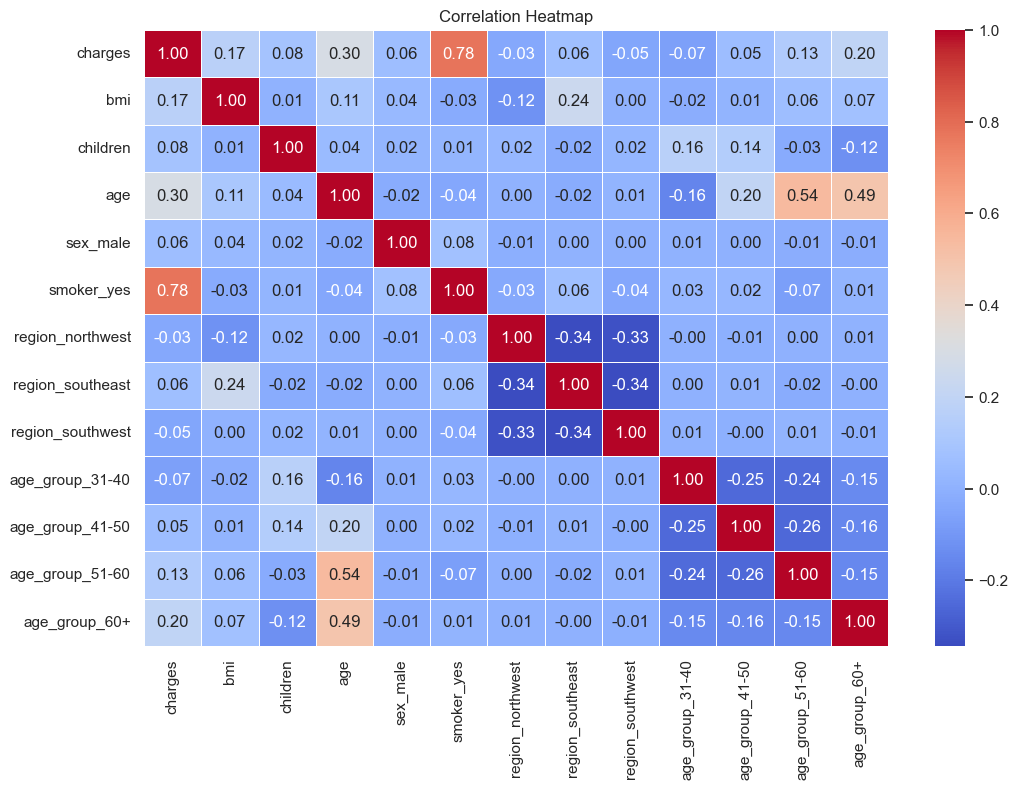

In [73]:
correlation_matrix = data_preprocessed.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### A plot Showing the feature importance from the Random Forest Model

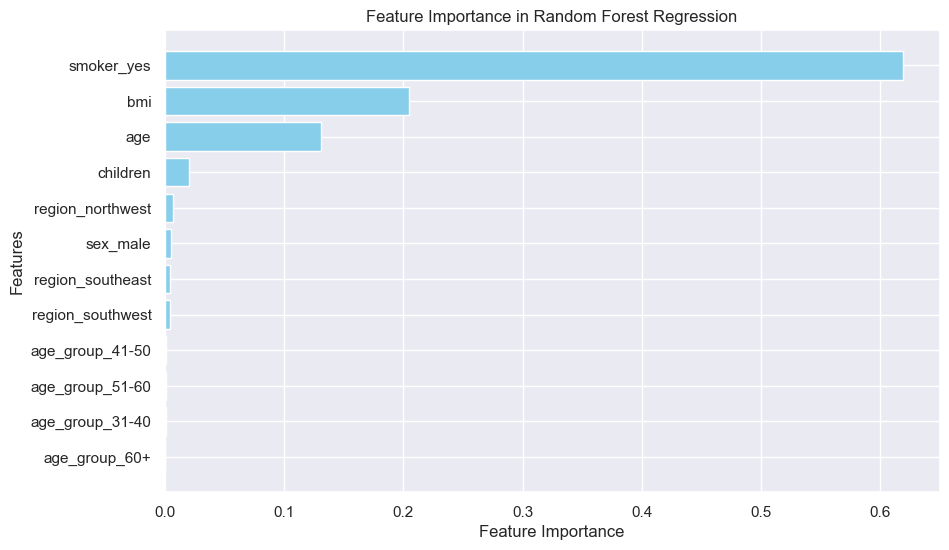

In [81]:
# Extract feature importances from the model
# Feature names (ensure this matches your dataset)
feature_names = x_train.columns if isinstance(x_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]


feature_importances = rf_regressor.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Regression')
plt.gca().invert_yaxis()  # Invert y-axis so the most important feature is at the top
plt.show()